# Flower Detect
Identify and classify flower types based on their images.

In [1]:
data_dir=r"D:\Data centr\IMG_data\flowers"

# Dataset Collection
* Augment Data- Rotation, Croping, etc

Batch size is the number of training sample used in one forward and backward pass through the model during training.

Sample= 1,000, batch_size = 32,
At each iteration,process 32 samples.

Iteration= 1000 ÷ 32 = ~32.

In [2]:
img_hgt=224
img_wdt=224
batch_sze=32 # 32 Sample

# Preprocess the Data
Build a CNN
* Resize all images to a fixed size (224x224)
* Normalize pixel values (0–1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [4]:
train_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for MobileNetV2
    rotation_range=30, # rotate image by 30 degree
    width_shift_range=0.2,  # shift horizontally by 20% of width
    height_shift_range=0.2,  # shift vertically by 20% of height
    shear_range=0.2, # Shearing skews the image along one axis, making it look like the image is "slanted."
    zoom_range=0.2, # zooms in or out by up to 20%
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Split for training and validation set by 20% of images
)

# Split the dataset
Train_data & Validation_data

In [5]:
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_hgt, img_wdt),
    batch_size=batch_sze,
    class_mode='categorical',
    subset='training'
)

Found 604 images belonging to 11 classes.


In [6]:
val_data=train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_hgt,img_wdt),
    batch_size=batch_sze,
    class_mode="categorical",
    subset='validation'
)

Found 145 images belonging to 11 classes.


# Train the Model
* Loss Function: Use categorical_crossentropy for multi-class classification.
* Optimizer: Use Adam with a learning rate of 0.001.
* Epochs: The number of times the entire dataset is processed during training.
Start with 20–50 epochs, depending on the dataset size.

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf


In [8]:
base_model=MobileNetV2( # pre trained deep learning model
    weights='imagenet', # trained on the ImageNet dataset (1,000 categories like dogs, cats, cars, etc)
    include_top=False, # Removes the final classification layer of MobileNetV2 and add custom layers for flower dataset.
    input_shape=(img_hgt,img_wdt,3) # 3- color channer(RGB)
    )
base_model.trainable=False  # Freezing the base model means the weights of MobileNetV2 will not be updated during training.

In [9]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)  # Fully connected layer
output_tensor = Dense(5, activation='softmax')(x)  # Output layer for 5 classes
x = Dense(128, activation='relu')(x)
output_tensor = Dense(5, activation='softmax')(x)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
model=Sequential([
    base_model, #frozen MobileNetV2 model, which acts as a feature extractor (e.g., shapes, textures, etc).
    tf.keras.layers.GlobalAveragePooling2D(), # Converts a 2D feature map into a 1D feature vector.
    Dense(128,activation='relu'), # Fully connected layer with 128 neurons and ReLU activation.
    Dropout(0.3), # Prevents overfitting by randomly setting 30% of the neurons to 0 during training
    Dense(train_data.num_classes,activation='softmax') # Output layer for flower types
])

Adam is an adaptive optimizer that adjusts learning rates during training for better convergence.

Categorical_crossentropy: Measures the difference between the predicted probability distribution (output of softmax) and the true labels.


In [12]:
from tensorflow.keras.optimizers import Adam 

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# CNN Training

In [14]:
epochs=10
history=model.fit(train_data,validation_data=val_data,epochs=epochs)

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2524 - loss: 2.2914

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.2599 - loss: 2.2692 - val_accuracy: 0.7931 - val_loss: 0.8414
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7637 - loss: 0.8671 - val_accuracy: 0.8552 - val_loss: 0.5392
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8217 - loss: 0.5643 - val_accuracy: 0.8759 - val_loss: 0.4939
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8570 - loss: 0.4622 - val_accuracy: 0.9103 - val_loss: 0.3882
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8819 - loss: 0.3921 - val_accuracy: 0.8414 - val_loss: 0.3898
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9396 - loss: 0.2688 - val_accuracy: 0.8621 - val_loss: 0.4175
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9039 - loss: 0.2920 - val_accuracy: 0.8828 - val_loss: 0.3900
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9129 - loss: 0.2492 - val_accuracy: 0.8759 - val_loss: 0.3424
Epo

# Evaluate the Model
* Use accuracy, precision, recall, and F1-score to measure performance.
* Plot training and validation loss/accuracy to ensure no overfitting.

In [15]:
val_loss,val_accuracy=model.evaluate(val_data)
print(f"validation Accuracy:{val_accuracy*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8955 - loss: 0.3728
validation Accuracy:88.97%


# Class Mapping

In [16]:
model.save('flower_classifier_model.h5')
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,754,147 (10.51 MB)

 Trainable params: 165,387 (646.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,776 (1.26 MB)

None


In [17]:
class_name=list(train_data.class_indices.keys()) # A dictionary mapping class names to integer labels list.
print("Class Label:",class_name)

Class Label: ['HRaj', 'bougainvillea', 'daisies', 'garden_rose', 'gardenias', 'hibiscus', 'hydrangeas', 'lilies', 'orchids', 'peonies', 'tulip']


# Testing Model

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def predict_flower(image_path):
    # Load and preprocess the image
    img=image.load_img(image_path,target_size=(img_hgt,img_wdt))
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)

    # Predict the flower type
    prediction=model.predict(img_array)
    prediction_class=class_name[np.argmax(prediction)]
    confidence=np.max(prediction)
  
    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(plt.imread(image_path))  # Load the image for display
    plt.axis('off')  # Remove axis labels
    plt.title(f"Predicted: {prediction_class}\nConfidence: {confidence * 100:.2f}%")
    plt.show()
    
    return prediction_class,confidence

# Normalization

In [20]:
from tensorflow.keras.layers import Rescaling

In [21]:
model_preprocessed=tf.keras.Sequential([
    Rescaling(1./255, input_shape=(224,224,3)), # Normalize layer
    model
])

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


File Saving

In [26]:
converter=tf.lite.TFLiteConverter.from_keras_model(model_preprocessed)
tflite_model=converter.convert()

with open('flower_classifier_model.tflite','wb') as f:
    f.write(tflite_model)
print(help(tf.lite.TFLiteConverter))

INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmpnlvmah_h\assets


INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmpnlvmah_h\assets


Saved artifact at 'C:\Users\himan\AppData\Local\Temp\tmpnlvmah_h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_165')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  2108156211280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156213968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156213392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156213584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156214352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156214544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156212048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156213776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156212432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2108156214928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [30]:
img_pth=r"D:\Data centr\IMG_data\flowers\hydrangeas\hydrangeas_00010.jpg"

# Prediction Result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


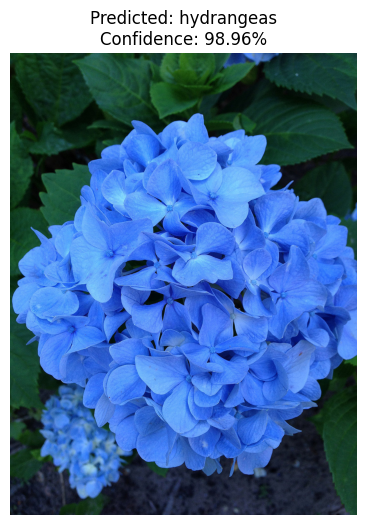

Predicted Flower Type: hydrangeas, Confidence: 98.96%


In [31]:
flower_type,confidence=predict_flower(img_pth)
print(f"Predicted Flower Type: {flower_type}, Confidence: {confidence * 100:.2f}%")